In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def f(x):
    return np.sin(x)

a,b=0,8
n=4
h=(b-a)/n
xint=np.linspace(a,b,n+1)
yint=f(xint)

-0.2538411333623447

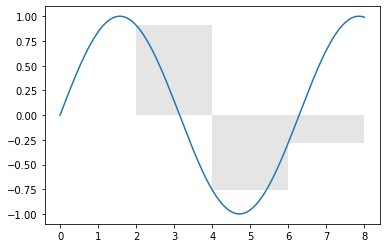

In [3]:
x=np.linspace(a,b,200)
plt.plot(x,f(x))
plt.bar(xint[:-1],yint[:-1],width=h,alpha=0.2,align='edge',facecolor='gray')

sum(yint[:-1])*h

1.7248753598844189

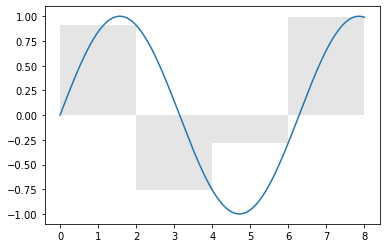

In [4]:
x=np.linspace(a,b,200)
plt.plot(x,f(x))
plt.bar(xint[:-1],yint[1:],width=h,alpha=0.2,align='edge',facecolor='gray')

sum(yint[1:])*h

0.7355171132610371

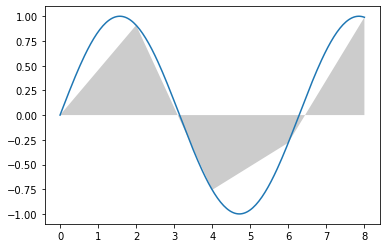

In [5]:
x=np.linspace(a,b,200)
plt.plot(x,f(x))
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)

sum(yint[1:] + yint[:-1])*h/2

In [6]:
quad(f,a,b)

(1.1455000338086139, 5.714145399931257e-14)